In [ ]:
import pandas as pd
import os
import fnmatch
import numpy as np
import shutil
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models, transforms
import random
import matplotlib.pyplot as plt
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import torch.nn as nn
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
!gdown --id  17aEbXhc2nhxyqW-Nhe9vMjZhOxIrOQmR  --output "transfer_learning.pth" 

Downloading...
From: https://drive.google.com/uc?id=17aEbXhc2nhxyqW-Nhe9vMjZhOxIrOQmR
To: /content/transfer_learning.pth
100% 228M/228M [00:03<00:00, 59.7MB/s]


In [ ]:
!gdown --id  1WHJvZs1X1rudeHQANKsy3sQK1WMaZG2i  --output "T.zip" 
# ! wget ....

Downloading...
From: https://drive.google.com/uc?id=1WHJvZs1X1rudeHQANKsy3sQK1WMaZG2i
To: /content/T.zip
100% 459k/459k [00:00<00:00, 30.6MB/s]


In [ ]:
!unzip T.zip

Archive:  T.zip
   creating: T/
  inflating: __MACOSX/._T            
  inflating: T/A1.jpg                
  inflating: __MACOSX/T/._A1.jpg     
  inflating: T/.DS_Store             
  inflating: __MACOSX/T/._.DS_Store  
  inflating: T/E1.jpg                
  inflating: __MACOSX/T/._E1.jpg     
  inflating: T/D1.jpg                
  inflating: __MACOSX/T/._D1.jpg     
  inflating: T/C1.jpg                
  inflating: __MACOSX/T/._C1.jpg     
  inflating: T/G.C.C.jpg             
  inflating: __MACOSX/T/._G.C.C.jpg  
  inflating: T/G.C.B.jpg             
  inflating: __MACOSX/T/._G.C.B.jpg  
  inflating: T/G.C.A.jpg             
  inflating: __MACOSX/T/._G.C.A.jpg  
  inflating: T/G.C.E.jpg             
  inflating: __MACOSX/T/._G.C.E.jpg  
  inflating: T/G.C.D.jpg             
  inflating: __MACOSX/T/._G.C.D.jpg  
  inflating: T/B1.jpg                
  inflating: __MACOSX/T/._B1.jpg     


In [ ]:
sorted(os.listdir('/content/test/T'))[1:]

['A1.jpg',
 'B1.jpg',
 'C1.jpg',
 'D1.jpg',
 'E1.jpg',
 'G.C.A.jpg',
 'G.C.B.jpg',
 'G.C.C.jpg',
 'G.C.D.jpg',
 'G.C.E.jpg']

In [ ]:
parent_dir = '/content'
path = os.path.join(parent_dir, 'test')
os.mkdir(path) 


In [ ]:
# file_name = os.listdir('/content/T')
shutil.move('/content/T', '/content/test')


'/content/test/T'

In [ ]:
data_dir = '/content/test'
classes = ('A', 'B', 'C', 'D', 'E')
val_transforms = transforms.Compose([

    transforms.ToTensor(),
    
])
val_ds = datasets.ImageFolder(data_dir, val_transforms)

In [ ]:
val_loader = torch.utils.data.DataLoader(val_ds, batch_size=10, 
        shuffle=False, drop_last=False, num_workers=2)

In [ ]:
def validation(testdata_loader, device=torch.device("cpu")):

  AlexNet_model.eval()

  with torch.no_grad():
    for data in testdata_loader:
      images, labels = data

      outputs = AlexNet_model(images.to(device))
      _, predicted = torch.max(outputs.data.detach().cpu(), 1)
      return predicted


In [ ]:
AlexNet_model = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=True)

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
AlexNet_model.classifier[6] = nn.Linear(4096,5)

In [ ]:
AlexNet_model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
for images, labels in val_loader:
    pass

# Get one batch
images, labels = next(iter(val_loader))
images.shape  # Output: torch.Size([30, 3, 500, 500])    [how many images, kernel(rgb), width, length]

torch.Size([10, 3, 500, 500])

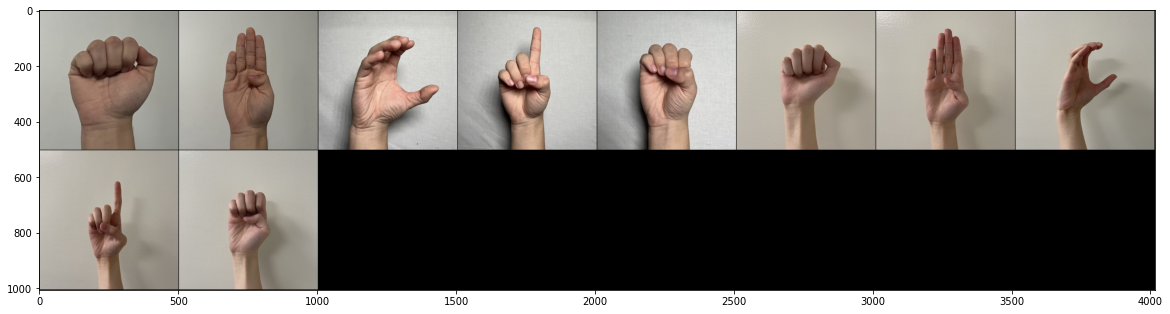

In [ ]:
def imshow(img):

  # img = img / 2 + 0.5
  npimg = img.numpy()
  plt.figure(figsize=(20,20))
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()
imshow(torchvision.utils.make_grid(images))

In [ ]:
PATH = './transfer_learning.pth'
AlexNet_model.load_state_dict(torch.load(PATH))
_ = AlexNet_model.to(device)
a = validation(val_loader, device=device)

In [ ]:
ls = []
result = []
for i in list(a):
  b = i.item()
  if i == 0:
    result.append('A')
  elif i == 1:
    result.append('B')
  elif i == 2:
    result.append('C')
  elif i == 3:
    result.append('D')
  elif i == 4:
    result.append('E')
  ls.append(b)

In [ ]:
result

['A', 'B', 'C', 'D', 'E', 'A', 'B', 'C', 'D', 'E']

In [ ]:
result_pd = pd.DataFrame(sorted(os.listdir('/content/test/T'))[1:], columns = ['Filename'])

In [ ]:
result_pd['Predicted_Label'] = result

In [ ]:
result_pd

,Filename,Predicted_Label
0,A1.jpg,A
1,B1.jpg,B
2,C1.jpg,C
3,D1.jpg,D
4,E1.jpg,E
5,G.C.A.jpg,A
6,G.C.B.jpg,B
7,G.C.C.jpg,C
8,G.C.D.jpg,D
9,G.C.E.jpg,E


In [ ]:
result_pd.to_csv('result.csv' ,index=False)